In [736]:
# import libraries
import numpy as np
import torch
import torch.nn as nn  # nn = neural network
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import myGraph
import text

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")  # set plot format to svg

# set dark style
plt.style.use("dark_background")

## Create data (x, y)

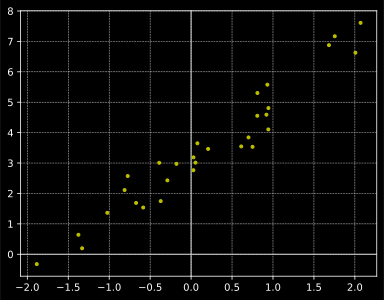

In [737]:
# create data

N = 30
x = torch.randn(N, 1)
y = 2*x + 3 + torch.randn(N, 1) / 2

myGraph.showAxes(plt, grid=True)

# and plot
plt.plot(x, y, ".y")

plt.show()

## Build Model (Layers):

In [738]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1),  # input layer: 1 input feature, 1 output feature, bias = True (default)
)

text.box('INITIAL (random) WEIGHTS AND BIASES')

print(f"w1: {ANNreg[0].weight.item():0.3f}")  # weight of first layer
print(f"w0: {ANNreg[0].bias.item():0.3f} (bias)")  # bias of first layer

┌──────────────────────────────────────────────────────────┐
│           INITIAL (random) WEIGHTS AND BIASES            │
└──────────────────────────────────────────────────────────┘
w1: 0.752
w0: -0.988 (bias)


## Select Learning Rate, loss Function, Optimizer

In [739]:
# learning rate
learningRate = 0.01

# loss function
lossfun = nn.MSELoss() # mean squared error loss

params = ANNreg.parameters() # parameters to optimize: weights and bias

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(params, lr=learningRate)

## Train the model

In [740]:
## Train the model!
def train(maxEpochs, loss_threshold):
    epoch = 0
    losses = []  # Python list.
    weights = []  # Python list.
    
    while epoch < maxEpochs:
        # forward pass
        yHat = ANNreg(x)  # compute predictions given inputs x

        # compute loss
        loss = lossfun(
            yHat, y
        )  # compute loss given true y and predicted yHat (mean squared error loss)
        losses.append(loss.detach().numpy())  # NumPy array

        # backprop
        optimizer.zero_grad()  # zero out gradients (otherwise they are accumulated)
        loss.backward()  # compute gradients (backpropagation)
        optimizer.step()  # update parameters with gradients (gradient descent)
        weights.append(
            [ANNreg[0].weight.item(), ANNreg[0].bias.item()]
        )  # save weights and bias

        if loss < loss_threshold:
            break

        epoch += 1
    
    return losses, weights, epoch


In [741]:
LOSS_THRESHOLD = 0.01  # stop when loss < threshold
maxEpochs = 250  # maximum number of epochs (full passes through the data)

losses, weights, epoch = train(maxEpochs, LOSS_THRESHOLD)

text.box(f"FINAL WEIGHTS AND BIASES ({epoch} epochs)", charset="=")

print(f"w1: {ANNreg[0].weight.item():0.3f}")  # weight of first layer
print(f"w0: {ANNreg[0].bias.item():0.3f} (bias)")  # bias of first layer

╔══════════════════════════════════════════════════════════╗
║          FINAL WEIGHTS AND BIASES (250 epochs)           ║
╚══════════════════════════════════════════════════════════╝
w1: 1.924
w0: 3.082 (bias)


## Show Results (losses, weights, biases)

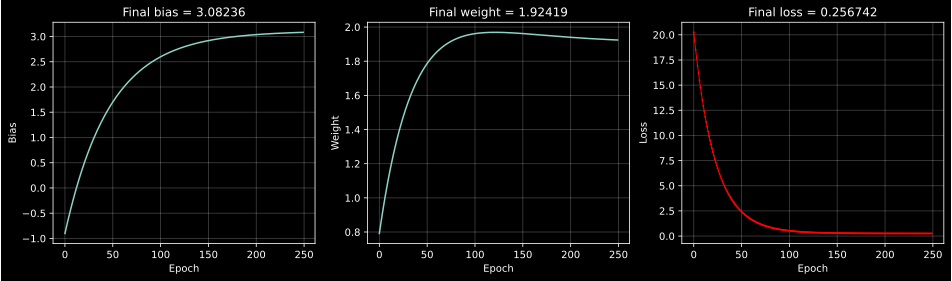

In [742]:
# show the losses
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

fig, axes = plt.subplots(1, 3, figsize=(16,4))

# plot the weights
axes[0].plot(np.array(weights)[:, 1])
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Bias")
axes[0].set_title("Final bias = %g" % ANNreg[0].bias.item())

axes[1].plot(np.array(weights)[:, 0])
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Weight")
axes[1].set_title("Final weight = %g" % ANNreg[0].weight.item())

# plot the losses
axes[2].plot(losses, ".-r", linewidth=1, markersize=2)
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Loss")
axes[2].set_title("Final loss = %g" % testloss.item())

# draw a soft grid for each plot
for ax in axes:
    ax.grid(True, alpha=0.25)


plt.show()


In [743]:
testloss.item() # final loss. Should be close to 0. item() extracts the value from the tensor.

0.25674229860305786

## Plot the data and the predictions

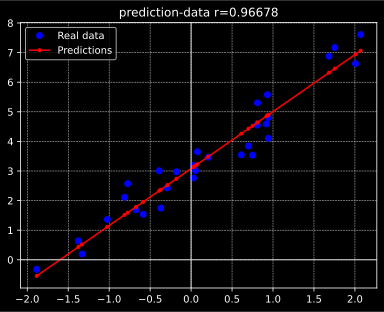

In [744]:
# plot the data and the predictions
plt.plot(x, y, "bo", label="Real data")
plt.plot(x, predictions.detach(), "-r.", label="Predictions")
plt.title(f"prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.5f}")
myGraph.showAxes(plt, grid=True)
plt.legend()
plt.show()

# Additional explorations

In [745]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

final losses: [array(0.15496264, dtype=float32), array(0.28325215, dtype=float32), array(0.23644863, dtype=float32), array(0.17827342, dtype=float32), array(0.3130064, dtype=float32), array(0.16277939, dtype=float32), array(0.33666557, dtype=float32), array(0.21093036, dtype=float32), array(0.44675553, dtype=float32), array(0.15309706, dtype=float32), array(0.20543073, dtype=float32), array(0.24177267, dtype=float32), array(0.22974151, dtype=float32), array(0.211802, dtype=float32), array(0.26341867, dtype=float32), array(0.27256212, dtype=float32), array(0.14188029, dtype=float32), array(0.13884968, dtype=float32), array(0.18650338, dtype=float32), array(0.28687873, dtype=float32), array(0.33974278, dtype=float32), array(0.24591422, dtype=float32), array(0.25703105, dtype=float32), array(0.10706793, dtype=float32), array(0.18957452, dtype=float32), array(0.502161, dtype=float32), array(0.21184692, dtype=float32), array(0.22999509, dtype=float32), array(0.27317938, dtype=float32), arra

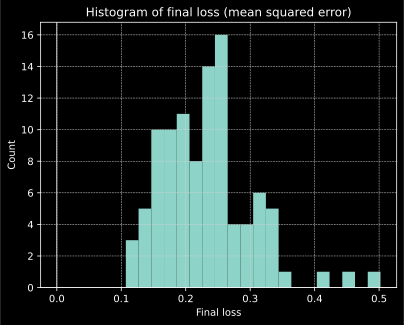

In [754]:
# train the model 100 times
maxEpochs = 100  # maximum number of epochs (full passes through the data)
LOSS_THRESHOLD = 0.1  # stop when loss < threshold
N = 30

finalLosses = []

for k in range(100):
    # create data

    x = torch.randn(N, 1)
    y = 2*x + 3 + torch.randn(N, 1) / 2

    losses, weights, epoch = train(maxEpochs, LOSS_THRESHOLD)
    finalLosses.append(losses[-1])

# make a histogram of the final losses
# (this is a histogram of the final loss after training for 250 epochs)

print(f'final losses: {finalLosses}')

plt.close()

myGraph.showAxes(plt, grid=True)

plt.hist(finalLosses, bins=20)
plt.xlabel("Final loss")
plt.ylabel("Count")
plt.title("Histogram of final loss (mean squared error)")
plt.show()
